## Import Libraries

In [48]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)

## Import the dataset

In [3]:
CSV_PATH = "../data/processed/processed.csv"

In [4]:
def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [5]:
## getting number of columns, row and column information
def get_data_info(xDR_df: pd.DataFrame):
    
    row_count, col_count = xDR_df.shape
    
    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {col_count}")

    return xDR_df.info()

In [6]:
## basic statistics of each column and see the data at glance
def get_statistics_info(xDR_df: pd.DataFrame):
    
    return xDR_df.describe(include='all')

In [7]:
# reading the extracted tellco data and getting information

xDR_df = read_proccessed_data(CSV_PATH)

get_data_info(xDR_df)
get_statistics_info(xDR_df)

file read as csv
Number of rows: 150001
Number of columns: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      150001 non-null  int64  
 1   Bearer Id                       150001 non-null  object 
 2   Start                           150000 non-null  object 
 3   Start ms                        150001 non-null  float64
 4   End                             150000 non-null  object 
 5   End ms                          150001 non-null  float64
 6   Dur. (ms)                       150001 non-null  float64
 7   IMSI                            150001 non-null  object 
 8   MSISDN/Number                   150001 non-null  object 
 9   IMEI                            150001 non-null  object 
 10  Last Location Name              150001 non-null  object 
 11  Avg RTT DL (ms) 

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001.000,150001,150000,150001.000,150000,150001.000,1.500e+05,150001,150001,150001,150001,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,150001.000,1.500e+05,1.500e+05,150001,150001,150001.000,150001.000,1.500e+05,150001.000,1.500e+05,1.500e+05,1.500e+05,150001.000,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05,1.500e+05
unique,NaN,10,9997,NaN,6403,NaN,NaN,4,106857,49,45037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171,1397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,7.35e+18,2019-04-26 07:25:00,NaN,2019-04-25 00:01:00,NaN,NaN,208000000000000.0,Uknown,86400000000000.0,9.16E+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apple,Huawei B528S-23A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,39915,203,NaN,1150,NaN,NaN,149428,1066,20768,1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59565,19752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,75000.000,NaN,NaN,499.188,NaN,498.801,1.046e+05,NaN,NaN,NaN,NaN,109.796,17.663,13300.046,1770.429,92.845,3.069,1.717,1.610,98.530,0.777,0.148,0.079,1.829e+06,1.409e+06,NaN,NaN,3719.788,4022.083,1.795e+06,32928.434,5.751e+06,2.057e+06,1.792e+06,467373.442,1.163e+07,1.101e+07,1.163e+07,1.100e+07,4.220e+08,8.288e+06,4.211e+08,8.265e+06,4.112e+07,4.546e+08
std,43301.703,NaN,NaN,288.611,NaN,288.097,8.104e+04,NaN,NaN,NaN,NaN,559.343,76.530,23971.799,4625.340,13.005,6.200,4.149,4.817,4.622,3.217,1.620,1.292,5.696e+06,4.643e+06,NaN,NaN,9148.498,10133.432,1.035e+06,19006.178,3.309e+06,1.190e+06,1.036e+06,269969.307,6.711e+06,6.345e+06,6.725e+06,6.359e+06,2.440e+08,4.783e+06,2.432e+08,4.769e+06,1.128e+07,2.441e+08
min,0.000,NaN,NaN,0.000,NaN,0.000,7.142e+03,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000e+00,NaN,NaN,1.000,1.000,1.200e+01,0.000,2.070e+02,3.000e+00,1.400e+01,2.000,5.300e+01,1.050e+02,4.200e+01,3.500e+01,2.516e+03,5.900e+01,3.290e+03,1.480e+02,2.867e+06,7.114e+06
25%,37500.000,NaN,NaN,250.000,NaN,251.000,5.744e+04,NaN,NaN,NaN,NaN,35.000,3.000,43.000,47.000,91.000,0.000,0.000,0.000,99.000,0.000,0.000,0.000,1.488e+04,2.154e+04,NaN,NaN,88.000,107.000,8.991e+05,16448.000,2.882e+06,1.024e+06,8.928e+05,233383.000,5.834e+06,5.518e+06,5.777e+06,5.476e+06,2.105e+08,4.128e+06,2.102e+08,4.146e+06,3.322e+07,2.431e+08
50%,75000.000,NaN,NaN,499.000,NaN,500.000,8.640e+04,NaN,NaN,NaN,NaN,54.000,7.000,63.000,63.000,100.000,0.000,0.000,0.000,100.000,0.000,0.000,0.000,3.930e+04,4.679e+04,NaN,NaN,205.000,220.000,1.794e+06,32920.000,5.766e+06,2.055e+06,1.794e+06,466250.000,1.162e+07,1.101e+07,1.164e+07,1.100e+07,4.234e+08,8.291e+06,4.218e+08,8.267e+06,4.114e+07,4.558e+08
75%,112500.000,NaN,NaN,749.000,NaN,750.000,1.324e+05,NaN,NaN,NaN,NaN,109.796,17.663,19710.000,1120.000,100.000,4.000,1.000,1.000,100.000,0.000,0.000,0.000,6.796e+05,5.991e+05,NaN,NaN,2765.000,2560.000,2.695e+06,49334.000,8.624e+06,3.088e+06,2.689e+06,700440.000,1.745e+07,1.652e+07,1.747e+07,1.651e+07,6.332e+08,1.243e+0

## Data Exploration

In [8]:
#Top 10 handsets used by the customers
xDR_df['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [9]:
#Top 3 handset manufacturers
top_manufacturers=xDR_df['Handset Manufacturer'].value_counts().head(3)
top_manufacturers

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [10]:
# Top 5 handsets per top 3 handset manufacturer
x = xDR_df[xDR_df["Handset Manufacturer"].isin(top_manufacturers.keys())]
x['Handset Type'].groupby(xDR_df['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

In [11]:
#number of xDR sessions
xDR_df.groupby('MSISDN/Number')['Bearer Id'].count().nlargest(10)

MSISDN/Number
Uknown           1066
33626320676.0      18
33614892860.0      17
33625779332.0      17
33659725664.0      16
33675877202.0      15
33760536639.0      15
33667163239.0      13
33603127838.0      12
33604515716.0      12
Name: Bearer Id, dtype: int64

In [12]:
#session duration
xDR_df.groupby('MSISDN/Number')['Dur. (ms)'].sum().nlargest(10)

MSISDN/Number
Uknown           7.255e+07
33625779332.0    1.855e+07
33614892860.0    9.967e+06
33760536639.0    9.279e+06
33626320676.0    8.792e+06
33667163239.0    8.745e+06
33662840755.0    6.614e+06
33664693736.0    6.289e+06
33603127838.0    6.288e+06
33667456716.0    5.650e+06
Name: Dur. (ms), dtype: float64

In [13]:
#Total download (DL) and upload (UL) data
xDR_df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().nlargest(10, ['Total DL (Bytes)', 'Total UL (Bytes)'])

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
Uknown,4.874e+11,4.437e+10
33614892860.0,8.157e+09,6.895e+08
33760536639.0,7.811e+09,7.035e+08
33625779332.0,7.770e+09,7.296e+08
33675877202.0,7.310e+09,5.816e+08
33626320676.0,7.302e+09,6.697e+08
33659725664.0,7.082e+09,6.243e+08
33666464084.0,6.903e+09,4.051e+08
33760413819.0,6.611e+09,5.215e+08


In [14]:
#the total data volume (in Bytes) during this session for each application

xDR_df['Youtube'] = xDR_df['Youtube DL (Bytes)'] + xDR_df['Youtube UL (Bytes)']
xDR_df['Google'] = xDR_df['Google DL (Bytes)'] + xDR_df['Google UL (Bytes)']
xDR_df['Email'] = xDR_df['Email DL (Bytes)'] + xDR_df['Email UL (Bytes)']
xDR_df['Netflix'] = xDR_df['Netflix DL (Bytes)'] + xDR_df['Netflix UL (Bytes)']
xDR_df['Gaming'] = xDR_df['Gaming DL (Bytes)'] + xDR_df['Gaming UL (Bytes)']
xDR_df['Other'] = xDR_df['Other DL (Bytes)'] + xDR_df['Other UL (Bytes)']
xDR_df['SocialMedia'] = xDR_df['Social Media DL (Bytes)'] + xDR_df['Social Media UL (Bytes)']
xDR_df['All'] = xDR_df['Total DL (Bytes)'] + xDR_df['Total UL (Bytes)']

In [15]:
#The total data volume (in Bytes) during this session for each application
xDR_df.groupby('MSISDN/Number').agg({'Youtube': 'sum','Google': 'sum','Email': 'sum','Netflix': 'sum','Gaming': 'sum','Other': 'sum','SocialMedia': 'sum','All':'sum' }).head(10)

,Youtube,Google,Email,Netflix,Gaming,Other,SocialMedia,All
MSISDN/Number,,,,,,,,
3200000000000.0,1.196e+07,1.044e+07,1.521e+06,2.659e+07,1.780e+08,4.705e+08,7.152e+05,2.321e+08
33601001722.0,2.162e+07,4.389e+06,1.331e+06,2.718e+07,8.125e+08,3.866e+08,2.232e+06,8.787e+08
33601001754.0,1.243e+07,5.335e+06,3.308e+06,1.122e+07,1.198e+08,2.817e+08,2.661e+06,1.569e+08
33601002511.0,2.133e+07,3.443e+06,3.205e+06,1.935e+07,5.388e+08,5.017e+08,3.196e+06,5.960e+08
33601007832.0,6.977e+06,9.678e+06,2.285e+06,1.942e+06,3.911e+08,3.528e+07,2.803e+05,4.223e+08
33601008617.0,4.153e+07,1.850e+07,3.305e+06,4.920e+07,1.315e+09,8.048e+08,2.913e+06,1.457e+09
33601010682.0,3.435e+07,1.526e+07,7.849e+06,3.032e+07,5.116e+08,4.924e+08,3.793e+06,6.152e+08
33601011634.0,2.643e+07,1.020e+07,1.359e+06,4.581e+07,5.485e+08,2.249e+08,2.770e+06,6.547e+08
33601011959.0,1.889e+07,1.202e+07,2.216e+06,1.529e+07,2.824e+08,1.782e+08,1.783e+06,3.327e+08


## Analyzing the basic metrics such as mean, and median in the dataset

In [16]:
xDR_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150001.0,7.500e+04,4.330e+04,0.000e+00,3.750e+04,7.500e+04,1.125e+05,1.500e+05
Start ms,150001.0,4.992e+02,2.886e+02,0.000e+00,2.500e+02,4.990e+02,7.490e+02,9.990e+02
End ms,150001.0,4.988e+02,2.881e+02,0.000e+00,2.510e+02,5.000e+02,7.500e+02,9.990e+02
Dur. (ms),150001.0,1.046e+05,8.104e+04,7.142e+03,5.744e+04,8.640e+04,1.324e+05,1.859e+06
Avg RTT DL (ms),150001.0,1.098e+02,5.593e+02,0.000e+00,3.500e+01,5.400e+01,1.098e+02,9.692e+04
Avg RTT UL (ms),150001.0,1.766e+01,7.653e+01,0.000e+00,3.000e+00,7.000e+00,1.766e+01,7.120e+03
Avg Bearer TP DL (kbps),150001.0,1.330e+04,2.397e+04,0.000e+00,4.300e+01,6.300e+01,1.971e+04,3.782e+05
Avg Bearer TP UL (kbps),150001.0,1.770e+03,4.625e+03,0.000e+00,4.700e+01,6.300e+01,1.120e+03,5.861e+04
DL TP < 50 Kbps (%),150001.0,9.284e+01,1.301e+01,0.000e+00,9.100e+01,1.000e+02,1.000e+02,1.000e+02
50 Kbps < DL TP < 250 Kbps (%),150001.0,3.069e+00,6.200e+00,0.000e+00,0.000e+00,0.000e+00,4.000e+00,9.300e+01


## Conducting a Non-Graphical Univariate Analysis

In [18]:
cols = ['Dur. (ms)', 'Youtube', 'Google', 'Email','Netflix','Gaming', 'Other', 'SocialMedia', 'All']
xDR_df[cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dur. (ms),150001.0,1.046e+05,8.104e+04,7.142e+03,5.744e+04,8.640e+04,1.324e+05,1.859e+06
Youtube,150001.0,2.264e+07,9.247e+06,7.890e+04,1.600e+07,2.266e+07,2.929e+07,4.519e+07
Google,150001.0,7.807e+06,3.516e+06,4.033e+04,4.944e+06,7.813e+06,1.068e+07,1.553e+07
Email,150001.0,2.259e+06,1.071e+06,8.359e+03,1.359e+06,2.264e+06,3.160e+06,4.518e+06
Netflix,150001.0,2.263e+07,9.261e+06,9.843e+04,1.598e+07,2.264e+07,2.929e+07,4.520e+07
Gaming,150001.0,4.303e+08,2.440e+08,3.064e+05,2.187e+08,4.316e+08,6.414e+08,8.592e+08
Other,150001.0,4.294e+08,2.433e+08,1.490e+05,2.186e+08,4.300e+08,6.399e+08,8.595e+08
SocialMedia,150001.0,1.828e+06,1.036e+06,1.563e+03,9.322e+05,1.826e+06,2.727e+06,3.651e+06
All,150001.0,4.958e+08,2.444e+08,2.896e+07,2.845e+08,4.969e+08,7.065e+08,9.560e+08


## Graphical Univariate Analysis

In [40]:
# plotting functions
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()
    
def plot_heatmap(df:pd.DataFrame, title:str, cmap='Reds')->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap=cmap, vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=True )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

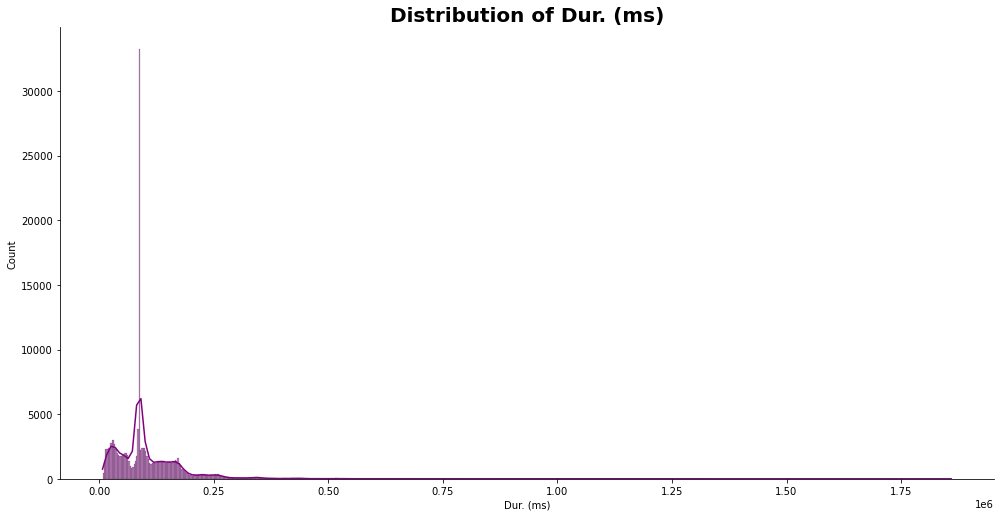

In [25]:
plot_hist(xDR_df, 'Dur. (ms)', color='purple')

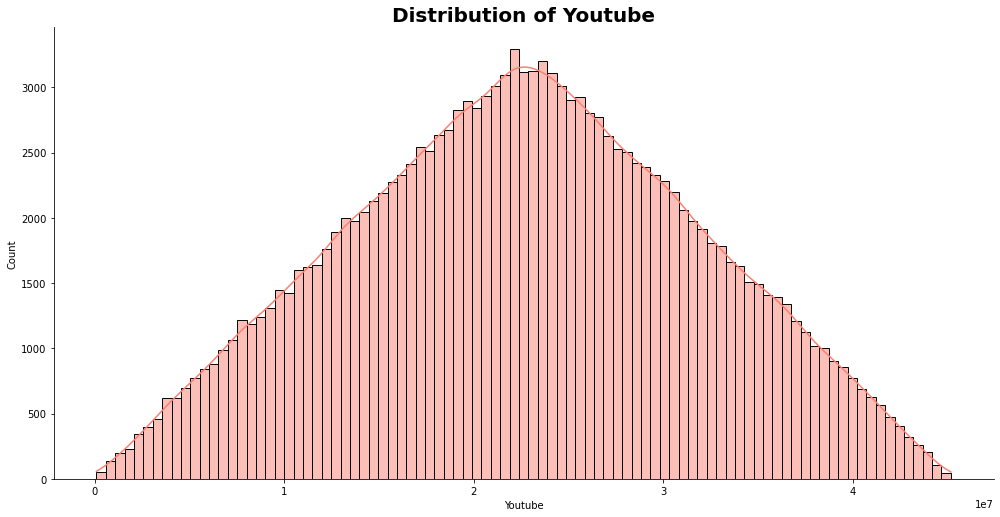

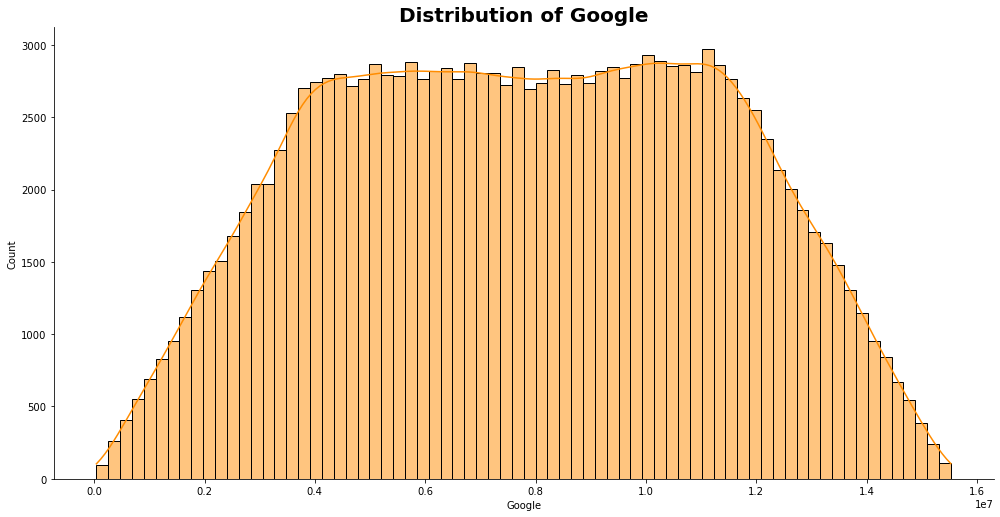

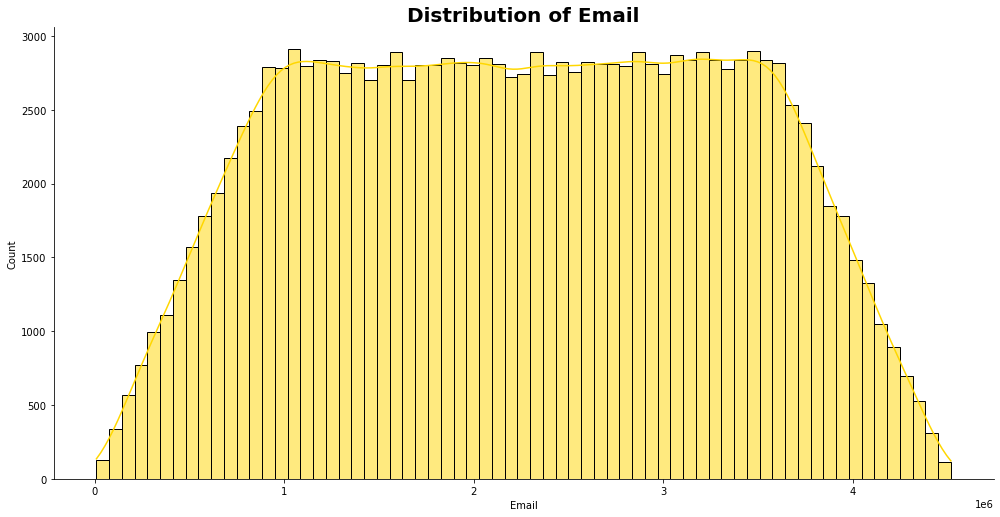

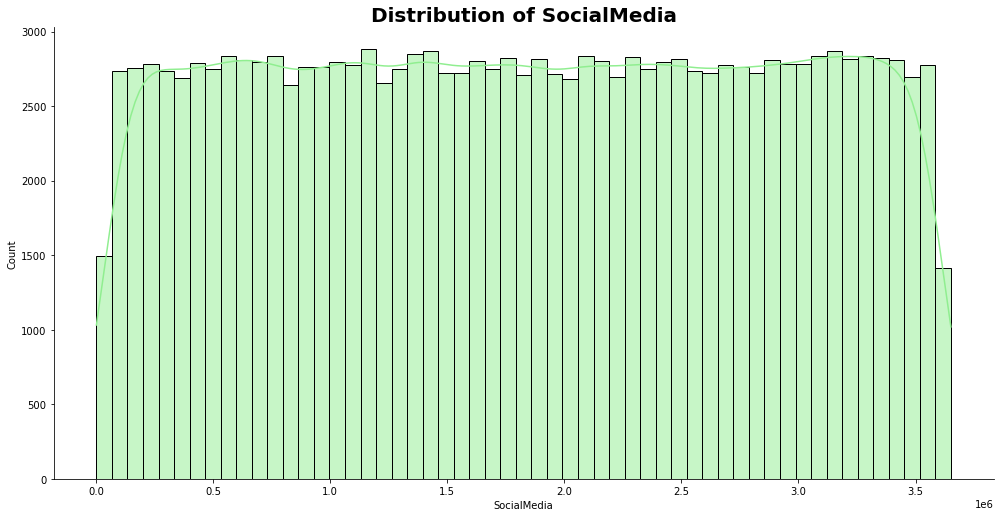

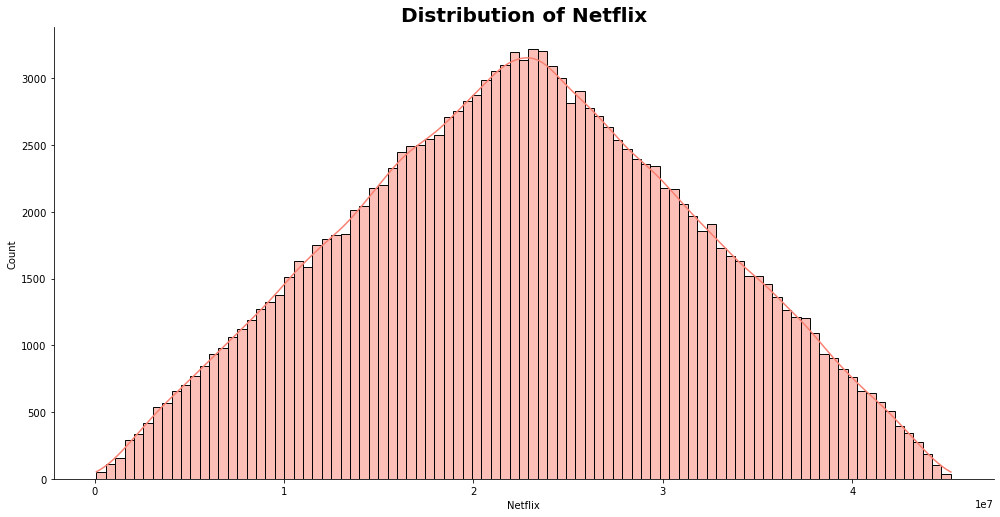

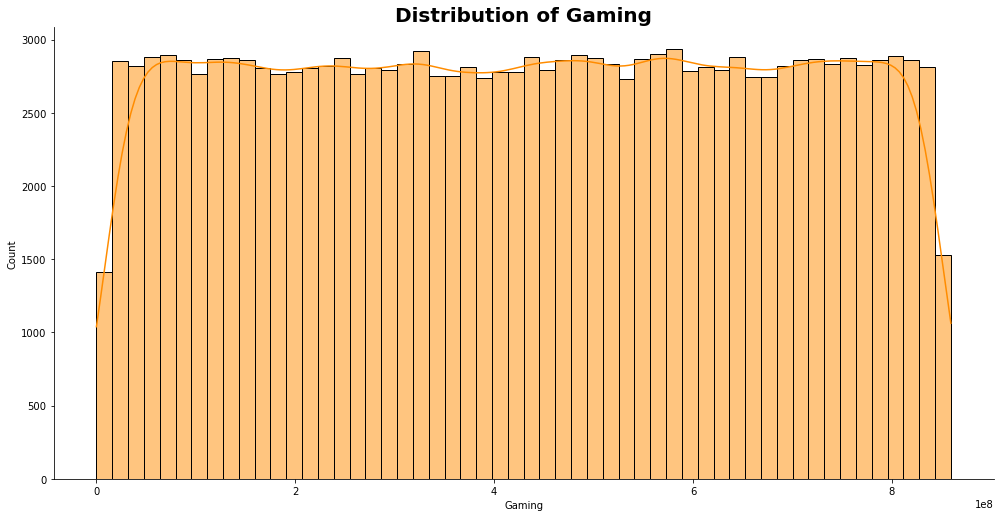

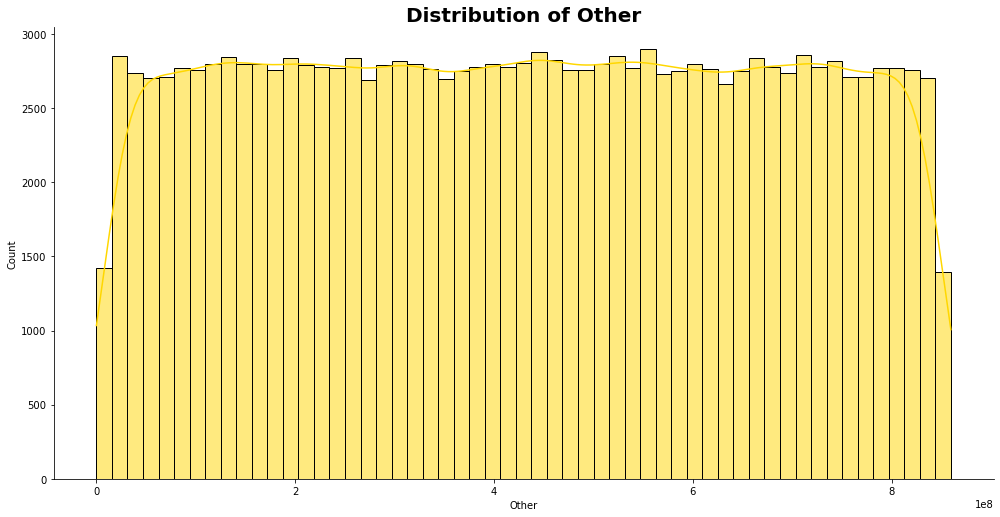

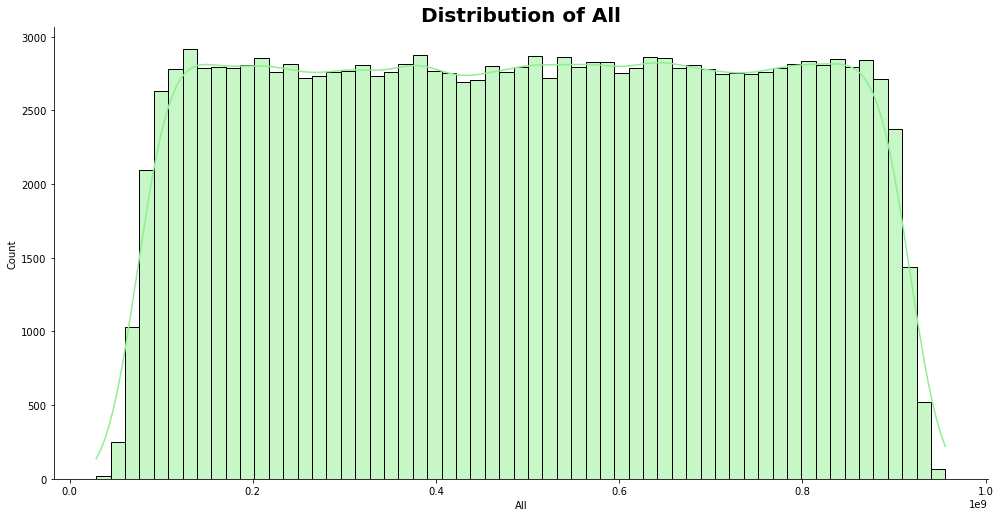

In [26]:
plot_hist(xDR_df, 'Youtube', color='salmon')
plot_hist(xDR_df, 'Google', color='darkorange')
plot_hist(xDR_df, 'Email', color='gold')
plot_hist(xDR_df, 'SocialMedia', color='lightgreen')
plot_hist(xDR_df, 'Netflix', color='salmon')
plot_hist(xDR_df, 'Gaming', color='darkorange')
plot_hist(xDR_df, 'Other', color='gold')
plot_hist(xDR_df, 'All', color='lightgreen')

## Bivariate Analysis

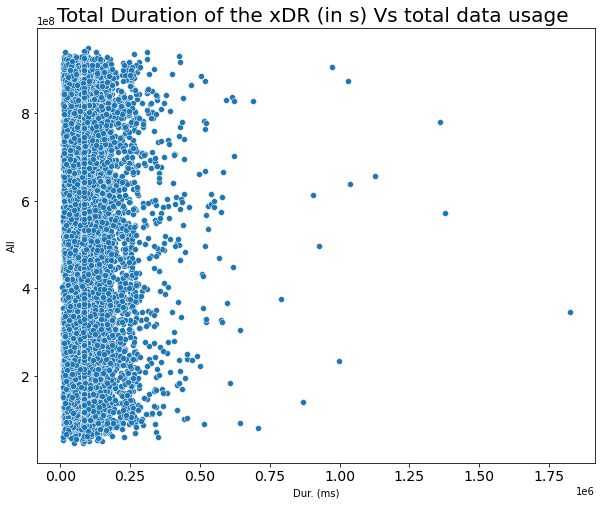

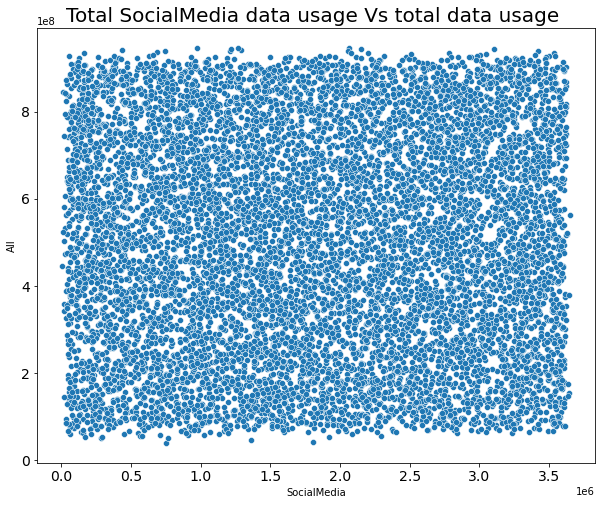

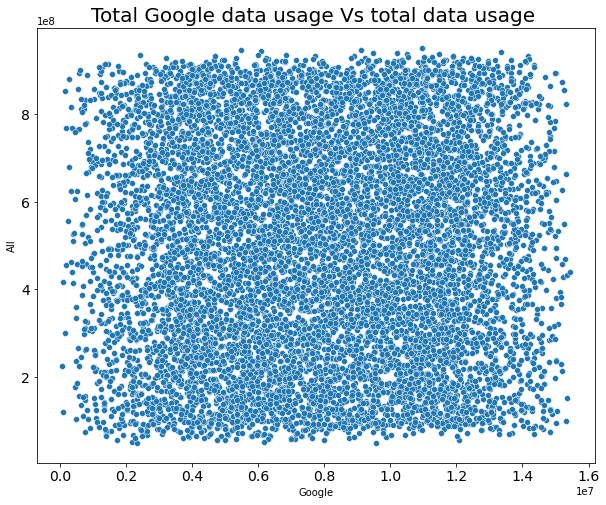

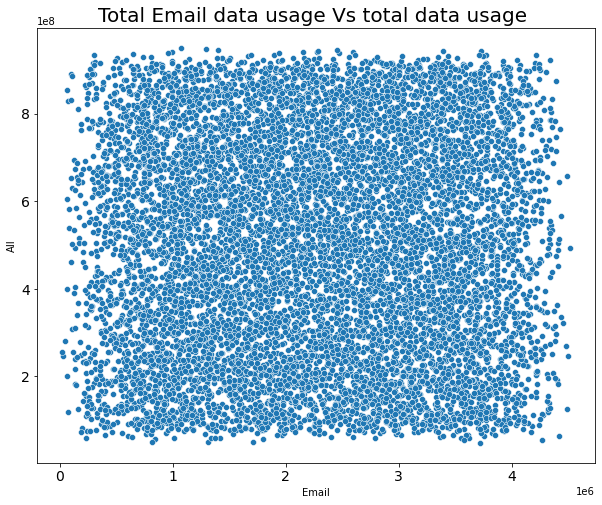

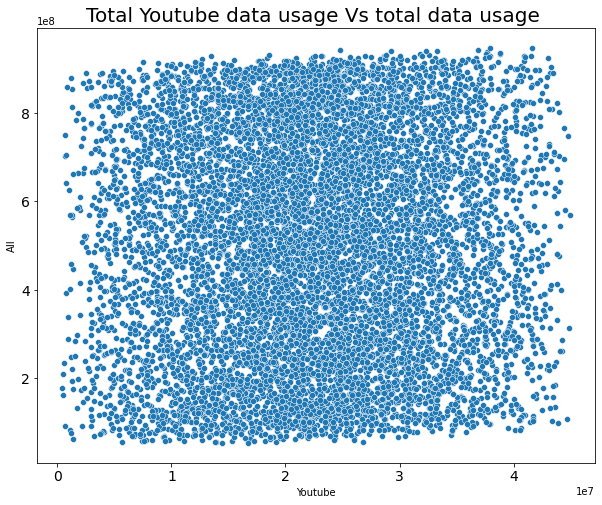

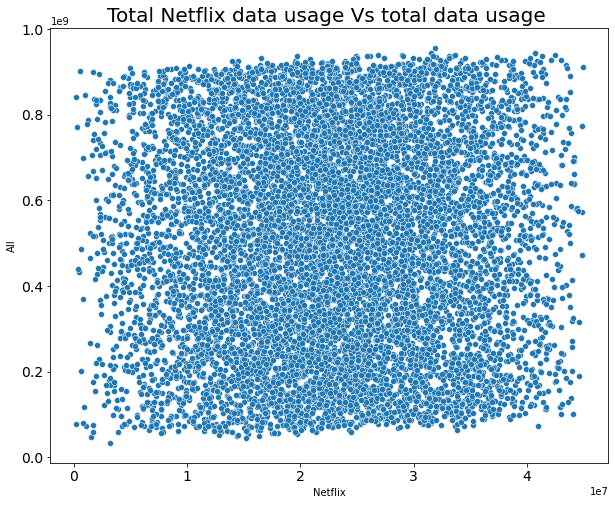

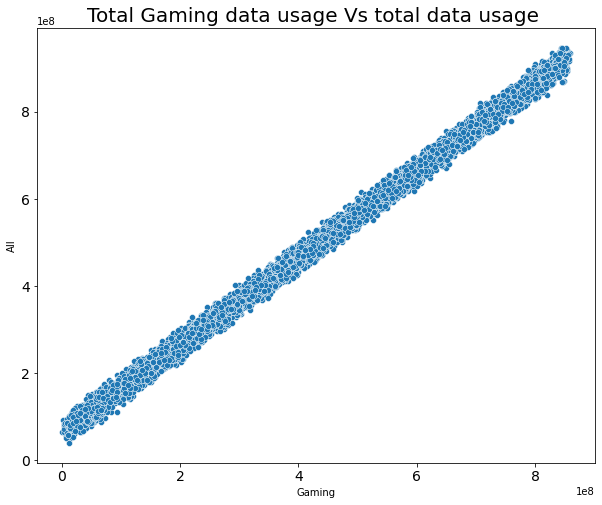

In [29]:
plot_scatter(xDR_df.sample(10000), 'Dur. (ms)', 'All', 'Total Duration of the xDR (in s) Vs total data usage ')

plot_scatter(xDR_df.sample(10000), 'SocialMedia', 'All', 'Total SocialMedia data usage Vs total data usage ')

plot_scatter(xDR_df.sample(10000), 'Google', 'All', 'Total Google data usage Vs total data usage ')
plot_scatter(xDR_df.sample(10000), 'Email', 'All', 'Total Email data usage Vs total data usage ')
plot_scatter(xDR_df.sample(10000), 'Youtube', 'All', 'Total Youtube data usage Vs total data usage ')
plot_scatter(xDR_df.sample(10000), 'Netflix', 'All', 'Total Netflix data usage Vs total data usage ')

plot_scatter(xDR_df.sample(10000), 'Gaming', 'All', 'Total Gaming data usage Vs total data usage ')

## Variable transformations

In [34]:
data = xDR_df[['MSISDN/Number', 'Dur. (ms)', 'All']]
agg_data = data.groupby('MSISDN/Number').sum()

#segmenting the users into five decile classes based on the total duration for all sessions
deciles = pd.qcut(agg_data['Dur. (ms)'], 5, labels=["1st_decile", "2nd_decile", "3rd_decile", "4th_decile","5th_decile"])

#adding decile column
agg_data_decile = agg_data.copy()   
agg_data_decile['decile'] = deciles

#computing the total data (DL+UL) per decile class
total_data_and_agg_data_decile = agg_data_decile.groupby('decile').agg({'All': 'sum', 'Dur. (ms)': 'sum'})
total_data_and_agg_data_decile

,All,Dur. (ms)
decile,,
1st_decile,1.155e+13,6.443e+08
2nd_decile,1.257e+13,1.808e+09
3rd_decile,1.157e+13,2.125e+09
4th_decile,1.397e+13,3.449e+09
5th_decile,2.470e+13,7.666e+09


## Correlation Analysis

In [38]:
app_cols = ['Youtube','Google', 'Email', 'Netflix', 'SocialMedia', 'Gaming', 'Other']

corr_df = xDR_df[app_cols].corr()
corr_df

,Youtube,Google,Email,Netflix,SocialMedia,Gaming,Other
Youtube,1.000e+00,2.277e-03,-2.919e-03,0.003,5.475e-04,-2.999e-03,0.003
Google,2.277e-03,1.000e+00,-4.124e-04,-0.002,-1.708e-03,-9.944e-04,-0.002
Email,-2.919e-03,-4.124e-04,1.000e+00,0.001,4.032e-03,-6.442e-04,-0.001
Netflix,2.882e-03,-1.902e-03,1.029e-03,1.000,1.013e-03,-3.109e-03,-0.009
SocialMedia,5.475e-04,-1.708e-03,4.032e-03,0.001,1.000e+00,1.082e-03,0.006
Gaming,-2.999e-03,-9.944e-04,-6.442e-04,-0.003,1.082e-03,1.000e+00,-0.003
Other,2.969e-03,-1.727e-03,-1.299e-03,-0.009,6.065e-03,-2.661e-03,1.000


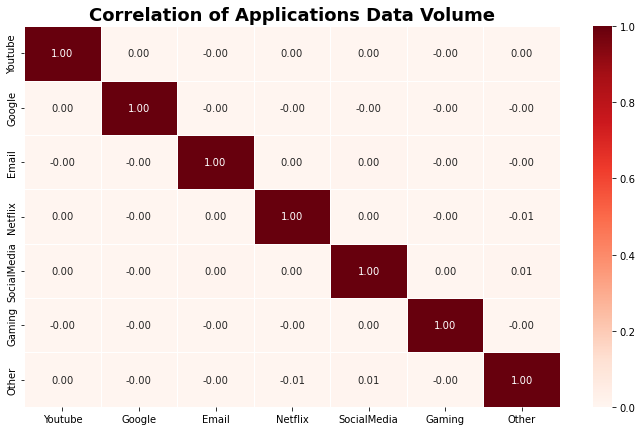

In [41]:
plot_heatmap(corr_df, "Correlation of Applications Data Volume")

## Dimensionality Reduction

In [43]:
app_cols = ['Youtube','Google', 'Email', 'Netflix', 'SocialMedia', 'Gaming', 'Other']

dr_df = xDR_df[app_cols]

dr_df.sample(5)

,Youtube,Google,Email,Netflix,SocialMedia,Gaming,Other
59517,3.296e+07,1.021e+07,3.457e+06,3.297e+07,1.977e+06,6.010e+08,3.537e+08
45011,1.150e+07,1.386e+07,4.273e+06,1.875e+07,3.154e+06,3.439e+08,7.105e+08
68555,2.680e+07,1.003e+07,2.056e+06,2.845e+07,8.446e+05,2.019e+08,5.150e+08
71812,2.120e+07,8.157e+06,6.878e+05,2.213e+07,4.354e+05,3.590e+08,3.576e+08
61108,2.458e+07,9.367e+06,6.884e+05,2.453e+07,1.827e+06,6.827e+08,4.076e+08


In [44]:
scaler = StandardScaler()
scaler.fit(dr_df)

StandardScaler()

In [47]:
scaled_data=scaler.transform(dr_df)
scaled_data

array([[-4.63679737e-01, -1.39386039e+00,  1.34646093e+00, ...,
        -2.49183634e-01, -5.65146916e-01, -1.02277018e+00],
       [ 1.80772770e+00, -9.64961417e-01, -1.23397492e+00, ...,
         1.01413155e-01,  7.35957450e-01,  4.62840903e-01],
       [ 1.27414816e+00,  6.88721018e-01,  1.03073105e+00, ...,
        -9.84636974e-02, -8.21053930e-01, -5.94284347e-02],
       ...,
       [ 2.02549697e-01, -3.47464050e-01, -1.87493493e-01, ...,
        -5.48462530e-01,  5.59795087e-01, -1.22067292e+00],
       [-5.97070647e-01, -1.42268867e-02,  5.52524187e-01, ...,
        -9.70548261e-01, -3.08445738e-01,  1.58983455e+00],
       [-9.30048132e-10, -1.63043825e-10, -5.60164485e-11, ...,
         3.41170738e-10,  2.00529496e-11,  2.08823194e-11]])

In [49]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [50]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(150001, 7)

In [51]:
x_pca.shape

(150001, 2)

In [52]:
scaled_data

array([[-4.63679737e-01, -1.39386039e+00,  1.34646093e+00, ...,
        -2.49183634e-01, -5.65146916e-01, -1.02277018e+00],
       [ 1.80772770e+00, -9.64961417e-01, -1.23397492e+00, ...,
         1.01413155e-01,  7.35957450e-01,  4.62840903e-01],
       [ 1.27414816e+00,  6.88721018e-01,  1.03073105e+00, ...,
        -9.84636974e-02, -8.21053930e-01, -5.94284347e-02],
       ...,
       [ 2.02549697e-01, -3.47464050e-01, -1.87493493e-01, ...,
        -5.48462530e-01,  5.59795087e-01, -1.22067292e+00],
       [-5.97070647e-01, -1.42268867e-02,  5.52524187e-01, ...,
        -9.70548261e-01, -3.08445738e-01,  1.58983455e+00],
       [-9.30048132e-10, -1.63043825e-10, -5.60164485e-11, ...,
         3.41170738e-10,  2.00529496e-11,  2.08823194e-11]])

In [53]:
x_pca

array([[-5.07459273e-01, -1.22715742e+00],
       [-2.23792116e-01,  1.20790495e+00],
       [-1.50547943e-01,  9.91291282e-01],
       ...,
       [-5.83762632e-01, -3.04011695e-01],
       [ 1.12508518e+00, -6.72013169e-02],
       [ 3.72519425e-12, -6.90060441e-10]])

Text(0, 0.5, 'Second principle component')

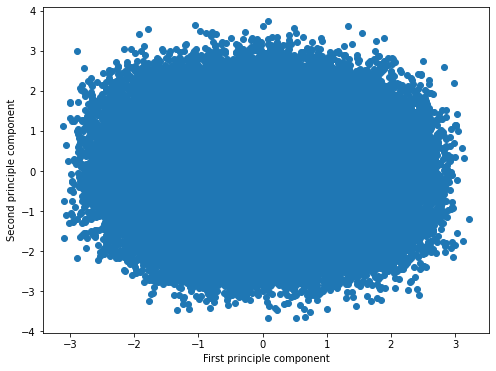

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')